# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

47cf149d8678d98f42bb20e2a8c38e70


In [4]:

record_count = 1
city_weather_data = []

for city in cities:
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_count}  |  {city}")
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        city_name = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
             
        city_weather_data.append({"City" : city_name,
                                 "Lat": city_lat,
                                 "Lng" : city_lon,
                                 "Max Temp" : city_temp,
                                 "Humidity" : city_humidity,
                                 "Cloudiness" : city_clouds,
                                 "Wind Speed" : city_wind,
                                 "Country" : city_country,
                                 "Date" : city_date})
              
    except:
        print(city + " City Not Found")

Processing Record 1  |  havre
Processing Record 2  |  rikitea
Processing Record 3  |  punta arenas
Processing Record 4  |  ixtapa
Processing Record 5  |  namibe
Processing Record 6  |  torbay
Processing Record 7  |  khatanga
Processing Record 8  |  mataura
Processing Record 9  |  muros
Processing Record 10  |  hermanus
Processing Record 11  |  neuquen
Processing Record 12  |  nikolskoye
Processing Record 13  |  garowe
Processing Record 14  |  kodiak
Processing Record 15  |  ushuaia
Processing Record 16  |  la ronge
Processing Record 17  |  iqaluit
Processing Record 18  |  grindavik
Processing Record 19  |  port alfred
Processing Record 20  |  kirensk
Processing Record 21  |  hobart
Processing Record 22  |  matadi
Processing Record 23  |  kapaa
Processing Record 24  |  solsvik
solsvik City Not Found
Processing Record 25  |  saint-joseph
Processing Record 26  |  sao jose da coroa grande
Processing Record 27  |  lagoa
Processing Record 28  |  port hardy
Processing Record 29  |  barentsbur

Processing Record 221  |  alcantarilla
Processing Record 222  |  tirumullaivasal
Processing Record 223  |  progreso
Processing Record 224  |  bharatpur
Processing Record 225  |  lososina
Processing Record 226  |  gat
Processing Record 227  |  kawalu
Processing Record 228  |  hami
Processing Record 229  |  anloga
Processing Record 230  |  gananoque
Processing Record 231  |  santa maria di sala
Processing Record 232  |  mayo
Processing Record 233  |  kotelnich
Processing Record 234  |  norrtalje
Processing Record 235  |  ostrovnoy
Processing Record 236  |  tumpat
Processing Record 237  |  tateyama
Processing Record 238  |  arlit
Processing Record 239  |  koundara
Processing Record 240  |  constitucion
Processing Record 241  |  dauphin
Processing Record 242  |  pitimbu
Processing Record 243  |  aranos
Processing Record 244  |  coihaique
Processing Record 245  |  karamea
karamea City Not Found
Processing Record 246  |  praia da vitoria
Processing Record 247  |  sokoni
Processing Record 248

Processing Record 442  |  cabo san lucas
Processing Record 443  |  desa
Processing Record 444  |  san andres
Processing Record 445  |  lisala
Processing Record 446  |  seduva
Processing Record 447  |  belmonte
Processing Record 448  |  kirakira
Processing Record 449  |  lagunas
Processing Record 450  |  duz
duz City Not Found
Processing Record 451  |  fort nelson
Processing Record 452  |  talcahuano
Processing Record 453  |  port-cartier
Processing Record 454  |  hovd
Processing Record 455  |  el cope
Processing Record 456  |  san cristobal
Processing Record 457  |  bakurianis andeziti
Processing Record 458  |  alice springs
Processing Record 459  |  kiruna
Processing Record 460  |  karratha
Processing Record 461  |  sorvag
sorvag City Not Found
Processing Record 462  |  ambulu
Processing Record 463  |  ngaoundere
Processing Record 464  |  westport
Processing Record 465  |  cedar city
Processing Record 466  |  palembang
Processing Record 467  |  rorvik
Processing Record 468  |  loubomo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(city_weather_data)

[{'City': 'Arrondissement du Havre', 'Lat': 49.5833, 'Lng': 0.3333, 'Max Temp': 6.78, 'Humidity': 87, 'Cloudiness': 100, 'Wind Speed': 0, 'Country': 'FR', 'Date': 1670428688}, {'City': 'Rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 23.88, 'Humidity': 81, 'Cloudiness': 19, 'Wind Speed': 7.87, 'Country': 'PF', 'Date': 1670428688}, {'City': 'Punta Arenas', 'Lat': -53.15, 'Lng': -70.9167, 'Max Temp': 10.06, 'Humidity': 34, 'Cloudiness': 20, 'Wind Speed': 5.14, 'Country': 'CL', 'Date': 1670428538}, {'City': 'Ixtapa', 'Lat': 20.7, 'Lng': -105.2, 'Max Temp': 26.79, 'Humidity': 69, 'Cloudiness': 0, 'Wind Speed': 1.15, 'Country': 'MX', 'Date': 1670428595}, {'City': 'Mossamedes', 'Lat': -15.1961, 'Lng': 12.1522, 'Max Temp': 22.09, 'Humidity': 75, 'Cloudiness': 16, 'Wind Speed': 4.68, 'Country': 'AO', 'Date': 1670428688}, {'City': 'Torbay', 'Lat': 47.6666, 'Lng': -52.7314, 'Max Temp': 4.38, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 4.12, 'Country': 'CA', 'Date': 1670428689}, {'C

In [6]:
city_weather_df=pd.DataFrame(city_weather_data)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arrondissement du Havre,49.5833,0.3333,6.78,87,100,0.00,FR,1670428688
1,Rikitea,-23.1203,-134.9692,23.88,81,19,7.87,PF,1670428688
2,Punta Arenas,-53.1500,-70.9167,10.06,34,20,5.14,CL,1670428538
3,Ixtapa,20.7000,-105.2000,26.79,69,0,1.15,MX,1670428595
4,Mossamedes,-15.1961,12.1522,22.09,75,16,4.68,AO,1670428688


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [8]:
#  Get the indices of cities that have humidity over 100%.
final_city_weather_df = city_weather_df.loc[(city_weather_df["Humidity"]<100)]
final_city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arrondissement du Havre,49.5833,0.3333,6.78,87,100,0.00,FR,1670428688
1,Rikitea,-23.1203,-134.9692,23.88,81,19,7.87,PF,1670428688
2,Punta Arenas,-53.1500,-70.9167,10.06,34,20,5.14,CL,1670428538
3,Ixtapa,20.7000,-105.2000,26.79,69,0,1.15,MX,1670428595
4,Mossamedes,-15.1961,12.1522,22.09,75,16,4.68,AO,1670428688
...,...,...,...,...,...,...,...,...,...
580,Atocha,-20.9333,-66.2333,13.79,44,92,4.08,BO,1670428908
581,Gaoua,10.2992,-3.2508,35.98,10,55,3.81,BF,1670428908
582,Camacha,33.0833,-16.3333,18.68,73,75,6.69,PT,1670428908
583,Aranda de Duero,41.6704,-3.6892,9.76,75,100,1.06,ES,1670428909


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

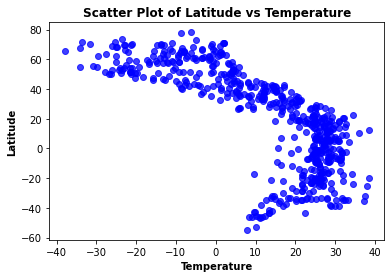

In [9]:
plt.scatter(final_city_weather_df["Max Temp"], final_city_weather_df["Lat"], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)
#plt.xlim(10,600)
plt.title('Scatter Plot of Latitude vs Temperature', weight='bold', color="black")
plt.xlabel('Temperature', weight='bold', color="black")

plt.ylabel("Latitude", weight='bold', color="black")
#plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
#plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
#plt.savefig('temp.png', transparent=True, dpi=500)


In [ ]:
#The graph above shows the relationship between Latitude and temperature. 
#This graph clearly shows that the farther away from the equator you are, the lower the temperature.

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

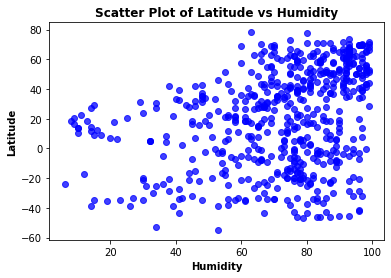

In [43]:
plt.scatter(final_city_weather_df["Humidity"], final_city_weather_df["Lat"], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)
#plt.xlim(10,600)
plt.title('Scatter Plot of Latitude vs Humidity', weight='bold', color="black")
plt.xlabel('Humidity', weight='bold', color="black")

plt.ylabel("Latitude", weight='bold', color="black")
#plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
#plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
#plt.savefig('temp.png', transparent=True, dpi=500)

In [ ]:
# The graph above displays the relationship between Latitude and Humidity.
#Generally, I would say that there is little relationship between the two.

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Latitude')

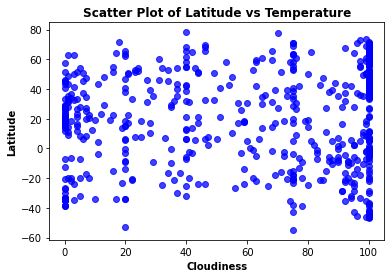

In [11]:
plt.scatter(final_city_weather_df["Cloudiness"], final_city_weather_df["Lat"], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)
#plt.xlim(10,600)
plt.title('Scatter Plot of Latitude vs Temperature', weight='bold', color="black")
plt.xlabel('Cloudiness', weight='bold', color="black")

plt.ylabel("Latitude", weight='bold', color="black")
#plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
#plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
#plt.savefig('temp.png', transparent=True, dpi=500)

In [ ]:
#This graph displays the relationship between latitude and cloudiness and there is clearly little correlation between the two.

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Latitude')

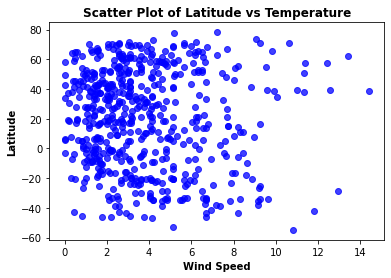

In [12]:
plt.scatter(final_city_weather_df["Wind Speed"], final_city_weather_df["Lat"], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)
#plt.xlim(10,600)
plt.title('Scatter Plot of Latitude vs Temperature', weight='bold', color="black")
plt.xlabel('Wind Speed', weight='bold', color="black")

plt.ylabel("Latitude", weight='bold', color="black")
#plt.tick_params(axis='x', colors="#1DB954", labelsize=12)
#plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
#plt.savefig('temp.png', transparent=True, dpi=500)

In [ ]:
#This graph shows the relationship between latitude and wind speed. Again, there seems to be little correlation.

## Linear Regression

In [44]:
northern_city_data = []
southern_city_data = []

northern_city_data = city_weather_df.loc[(city_weather_df["Lat"]> 0)]
southern_city_data = city_weather_df.loc[(city_weather_df["Lat"]< 0)]

southern_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.1203,-134.9692,23.88,81,19,7.87,PF,1670428688
2,Punta Arenas,-53.1500,-70.9167,10.06,34,20,5.14,CL,1670428538
4,Mossamedes,-15.1961,12.1522,22.09,75,16,4.68,AO,1670428688
7,Mataura,-46.1927,168.8643,8.38,87,99,1.75,NZ,1670428689
9,Hermanus,-34.4187,19.2345,21.56,74,0,5.57,ZA,1670428690


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

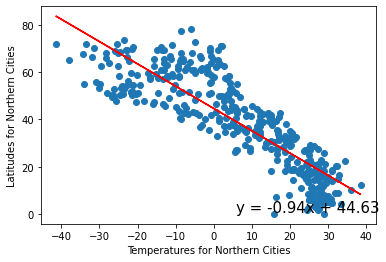

In [35]:
# Add the linear regression equation and line to plot
x_values = northern_city_data["Max Temp"]
y_values = northern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Temperatures for Northern Cities')
plt.ylabel('Latitudes for Northern Cities')
plt.show()


In [ ]:
#This graph show the linear regression between Temperatute and latitude in the northern hemisphere.
#There is a strong correlation between these two data points, with a negative linear slope. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

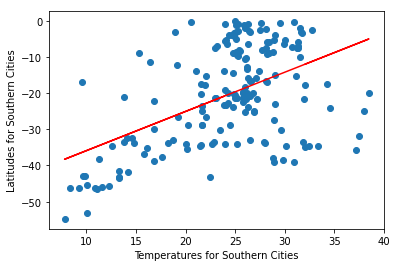

In [36]:
x_values = southern_city_data["Max Temp"]
y_values = southern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Temperatures for Southern Cities')
plt.ylabel('Latitudes for Southern Cities')
plt.show()

In [ ]:
#The graph above, show the relationship between latitude and temperature in the southern hemisphere. 
#In the southern hemisphere, there seem to be a weaker correlation and the linear slope here is a positive slope.
#a couple of other idea to note, there are fewer southern cities and they are not located as far south (max south latitude is < 60) when
#compared to cities in the north (max north latitude is around 80). This difference can account for some of the difference
#in correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

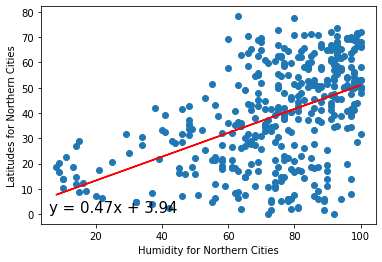

In [37]:
# Add the linear regression equation and line to plot
x_values = northern_city_data["Humidity"]
y_values = northern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Humidity for Northern Cities')
plt.ylabel('Latitudes for Northern Cities')
plt.show()

In [ ]:
#The graph above compares humidity to latitude. There is a very mild correlation between the two.
#Part of this may be that as you move farther form the equator, the temperature drops and the relative humidty will be
#because the atmostphere is less able hold moisture and the data was pulled near the beginning of Northern winter.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

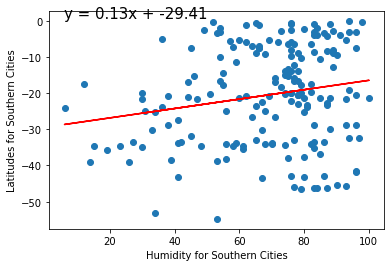

In [38]:
x_values = southern_city_data["Humidity"]
y_values = southern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Humidity for Southern Cities')
plt.ylabel('Latitudes for Southern Cities')
plt.show()

In [ ]:
#The graph above compares humidity to latitude. The is a very mild correlation between the two. Part of this is due to the
#that southern cities do not trend that far south. ALso, it is nearly southern summer when the data pulled. I believe that
#a closer inspection would show more of a correlation due to geography.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

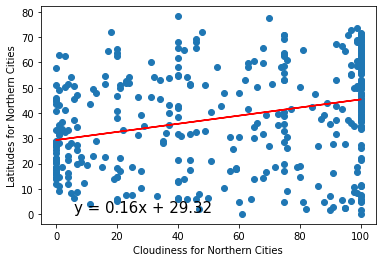

In [39]:
# Add the linear regression equation and line to plot
x_values = northern_city_data["Cloudiness"]
y_values = northern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Cloudiness for Northern Cities')
plt.ylabel('Latitudes for Northern Cities')
plt.show()

In [ ]:
#The graph above shows the  plots for cloudiness at different northern latitudes. There is very little correlation between 
#these two sets of data. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

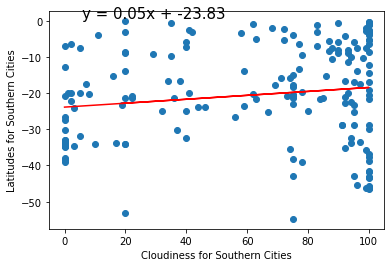

In [40]:
x_values = southern_city_data["Cloudiness"]
y_values = southern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Cloudiness for Southern Cities')
plt.ylabel('Latitudes for Southern Cities')
plt.show()

In [ ]:
#The graph above shows the  plots for cloudiness at different southern latitudes. There is very little correlation between 
#these two sets of data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

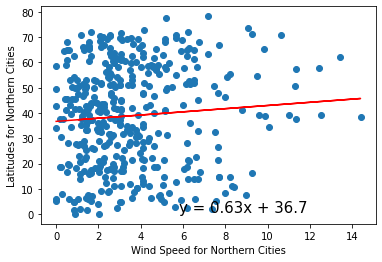

In [41]:
# Add the linear regression equation and line to plot
x_values = northern_city_data["Wind Speed"]
y_values = northern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Wind Speed for Northern Cities')
plt.ylabel('Latitudes for Northern Cities')
plt.show()

In [ ]:
#The graph above shows the  plots for wind speed at different northern latitudes. There is very little correlation between 
#these two sets of data. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

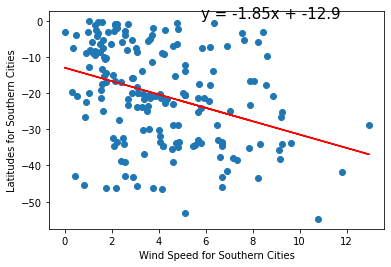

In [42]:
x_values = southern_city_data["Wind Speed"]
y_values = southern_city_data['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
plt.xlabel('Wind Speed for Southern Cities')
plt.ylabel('Latitudes for Southern Cities')
plt.show()

In [ ]:
#The graph above shows the  plots for cloudiness at different southern latitudes. There is very little correlation between 
#these two sets of data. 